# Basic tutorial: Extracting and visualizing twitter data

Why twitter data? Presents an ideal combination of size, international reach, and data
accessibility that make it the preferred platform in academic studies.

# We will do the following
1. Create a twitter account or use your existing Twitter account.
2. Request for twitter developer access key
3. Extract real-time tweets using Twitter Streaming API
4. Extract history tweets using Twitter Search/Rest API using Tweepy
5. Load the data to a pandas data frame
6. Wordcloud

Steps to request twitter access
1. Goto to https://developer.twitter.com/en/apps.
2. Log in using your twitter account. If you don’t have one then create one.
3. After logged in then create an app.
4. Fill out all the required fields.

Git Repo: https://github.com/ensoesie/DSA_Visualization.git 

# Import the libraries

In [8]:
import tweepy
import nltk
import pandas as pd
import sys
import csv 
from wordcloud import WordCloud, STOPWORDS
import matplotlib as mpl
import re
from PIL import Image
import json
import twitter
import numpy as np
# import pandas_profiling

## Twitter developer keys (Keys are not to be shared)

In [9]:
# The value inside quotes must be replaced by your keys if you are using this.
api = twitter.Api(consumer_key='xxxxxxxxxxxxxxxxxxxxxxxx',
                      consumer_secret='xxxxxxxxxxxxxxxxxxx',
                      access_token_key='xxxxxxxxxxxxxxxxxxxxx',
access_token_secret='xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx')


## Let's look at some tweets

Location data - Streaming API

In [11]:
# Filter by location; some location coordinates-https://gist.github.com/graydon/11198540
# for tweet in api.GetStreamFilter(locations = ['32.5532,0.2944,32.6212,0.3564']): 
for tweet in api.GetStreamFilter(locations = ['33.8935689697,-4.67677,41.8550830926,5.506']):
    print (tweet)
    break 

{u'quote_count': 0, u'contributors': None, u'truncated': False, u'text': u'Districts of #Kismayo city\nCALANLEY\nFARJANNO\nFAANOOLE\nSHAQAALAHA\nGUULWADE\n\n#Jubaland #Somalia https://t.co/MI461RKpIX', u'is_quote_status': False, u'in_reply_to_status_id': None, u'reply_count': 0, u'id': 1186251890356568064, u'favorite_count': 0, u'entities': {u'user_mentions': [], u'symbols': [], u'hashtags': [{u'indices': [13, 21], u'text': u'Kismayo'}, {u'indices': [75, 84], u'text': u'Jubaland'}, {u'indices': [85, 93], u'text': u'Somalia'}], u'urls': [], u'media': [{u'expanded_url': u'https://twitter.com/AbdisalamAato/status/1186251890356568064/photo/1', u'display_url': u'pic.twitter.com/MI461RKpIX', u'url': u'https://t.co/MI461RKpIX', u'media_url_https': u'https://pbs.twimg.com/media/EHZpy61WkAAUYHd.jpg', u'id_str': u'1186251875366113280', u'sizes': {u'small': {u'h': 680, u'resize': u'fit', u'w': 510}, u'large': {u'h': 1024, u'resize': u'fit', u'w': 768}, u'medium': {u'h': 1024, u'resize': u'fit', u

## lets save the json data to a file: stream.json

In [17]:
# "\n" is new line. We save the data to a file,
# with each new line we save all the information related to one tweet
f = open('./stream0.json', 'w')

for tweet in api.GetStreamFilter(locations = ['32.5532,0.2944,32.6212,0.3564']):
    #Kenya
# for tweet in api.GetStreamFilter(locations = ['33.8935689697,-4.67677,41.8550830926,5.506']): 
    f.write(json.dumps(tweet))
    f.write('\n') 
#     print (tweet)

KeyboardInterrupt: 

# Reading tweets from the json file

In [15]:
#Upload the json file and append it to a list
data=[]
with open('./stream1.json', 'r') as jsonFile:
    for line in jsonFile:
        data.append(json.loads(line))
print ("Total number of tweets loaded: ", len(data))
print(data)

ValueError: No JSON object could be decoded

# Check the keys and the tweet itself

In [7]:
print (data[0].keys())   # properties

[u'quote_count', u'contributors', u'truncated', u'text', u'is_quote_status', u'in_reply_to_status_id', u'reply_count', u'id', u'favorite_count', u'source', u'retweeted', u'coordinates', u'timestamp_ms', u'entities', u'in_reply_to_screen_name', u'in_reply_to_user_id', u'display_text_range', u'retweet_count', u'id_str', u'favorited', u'user', u'geo', u'in_reply_to_user_id_str', u'lang', u'created_at', u'filter_level', u'in_reply_to_status_id_str', u'place']


In [ ]:
# The dictionary consists of a lot of information like created, user ID, retweeted, timestamp, etc. 
# Just read from the dictionary what information you need and then proceed with the text mining and visualization.

In [7]:
print (data[0]["text"])  # how to access the  tweet message itself

@SarahSolomong Beautiful


In [ ]:
# About the search API or REST API
# Twitter’s Search API gives you access to a data set that already exists from tweets that have occurred. 
# For an individual user, the maximum number of tweets you can receive is the last 3,200 tweets, regardless of the query criteria. 
# With a specific keyword, you can typically only poll the last 5,000 tweets per keyword. 
# You are further limited by the number of requests you can make in a certain time period. 
# The Twitter request limits have changed over the years but are currently limited to 180 requests in a 15 minute period.


# Extract history tweets using Twitter Search/Rest API using Tweepy

Extracting the tweets @dsa_org. The maximum tweets allowed is 3200. 
I can’t extract the whole tweet history of the user if they have tweeted more than 3200 tweets.

In [19]:
consumer_key = "ryoIytUyHBiBxK7aIk1H48la8" 
consumer_secret = "Yzc5tDJtf6t8iJvAt6Cq6G4SPatw0AFtpOtwKodLXrNAkqlKjF"
access_key = "382027921-go6DGgjXikmEb1XZqeNYSTh1GzfoMWW4yeIU8FYB"
access_secret = "OiP1HPILePOIHQLAKoQqkgonvXM31Fil1HTP7BfKpMrP0"
  
    
def get_tweets(username): 
          
        # Authorization to consumer key and consumer secret 
        auth = tweepy.OAuthHandler(consumer_key, consumer_secret) 
        # Access to user's access key and access secret 
        auth.set_access_token(access_key, access_secret) 
        # Calling api 
        api = tweepy.API(auth) 
        #set count to however many tweets you want - max count is 3200 and this doesn't have any effect if it is more than 3200
        #number_of_tweets = 5000
       
        tfile = []
        for tweet in tweepy.Cursor(api.user_timeline, screen_name = username).items():

        #username, tweet id, date/time, text
            tfile.append([username, tweet.id_str,tweet.source, tweet.created_at,tweet.retweet_count,tweet.favorite_count, tweet.text.encode("utf-8")])

        #write to a new csv file from the array of tweets
        outfile = username + "_tweets_V1.csv"
        print ("writing to " + outfile)
        with open(outfile, 'w+') as file:
            writer = csv.writer(file, delimiter=',')
            writer.writerow(['User_Name', 'Tweet_ID', 'Source', 'Created_date','Retweet_count','Favorite_count','Tweet'])
            writer.writerows(tfile)
# user name
get_tweets("@dsa_org")

writing to @dsa_org_tweets_V1.csv


# Upload the data into a pandas data frame for data visualization

DataFrame is a 2-dimensional labeled data structure with columns of potentially different types. 
You can think of it like a spreadsheet or SQL table, or a dict of Series objects. 
It is generally the most commonly used pandas object.

In [20]:
#Read the file and also assign it to dataframe
import pandas as pd
bg= pd.read_csv("@dsa_org_tweets_V1.csv",encoding='utf-8') 
bg.head(10)

,User_Name,Tweet_ID,Source,Created_date,Retweet_count,Favorite_count,Tweet
0,@dsa_org,1186250028295303169,Twitter Web App,2019-10-21 11:57:00,3,11,"Great tutorials on Python, Pandas and Jupyter ..."
1,@dsa_org,1186240118132236288,Twitter Web App,2019-10-21 11:17:38,6,0,RT @ensoesie: One of the joys of Data Science ...
2,@dsa_org,1186232244807131136,Twitter Web App,2019-10-21 10:46:20,4,0,RT @ensoesie: I have the privilege of tweeting...
3,@dsa_org,1186228182279696384,Twitter Web App,2019-10-21 10:30:12,3,0,RT @ensoesie: The information infrastructure i...
4,@dsa_org,1186219781785112582,Twitter Web App,2019-10-21 09:56:49,9,28,You can sit in an office in Kampala and still ...
5,@dsa_org,1186214576305721345,Twitter Web App,2019-10-21 09:36:08,10,18,Data Science Africa is focused on developing l...
6,@dsa_org,1186211180894924800,Twitter Web App,2019-10-21 09:22:38,4,0,RT @ensoesie: We have participants from at lea...
7,@dsa_org,1186209543853953024,Twitter Web App,2019-10-21 09:16:08,10,0,RT @ensoesie: First day of Data Science Africa...
8,@dsa_org,1185468445359513600,Twitter for Android,2019-10-19 08:11:16,7,0,RT @charlesity: In a couple of days we meet ag...
9,@dsa_org,1184867257240956929,Twitter Web App,2019-10-17 16:22:22,27,76,"In 3 days time, we get to catch up with indust..."


# Do some basic cleaning of the tweets

In [35]:
bg.columns

Index([u'User_Name', u'Tweet_ID', u'Source', u'Created_date', u'Retweet_count',
       u'Favorite_count', u'Tweet'],
      dtype='object')

In [21]:
bg2 = []
# import re
pattern1 = re.compile(" ' # S % & ' ( ) * + , - . / : ; < = >  @ [ / ] ^ _ { | } ~")
pattern2 = re.compile("@[A-Za-z0-9]+") 
pattern3 = re.compile("https?://[A-Za-z0-9./]+")

for i in bg.index:
#     print item
    tweet = bg.iloc[i]['Tweet']
#     print tweet
    tweet = re.sub(pattern1, "", tweet)   # version 1 of the tweet
    tweet = re.sub(pattern2, "", tweet)
    tweet = re.sub(pattern3, "", tweet)
#     print tweet
    bg2.append(tweet.encode('utf-8'))

bg3 = pd.DataFrame(bg2,columns = ['tweet'])

The re.sub() function in the re module can be used to replace substrings. 
The syntax for re.sub() is re.sub(pattern,repl,string).

In [22]:
bg3.head(10)

,tweet
0,"Great tutorials on Python, Pandas and Jupyter ..."
1,RT : One of the joys of Data Science Africa is...
2,RT : I have the privilege of tweeting from _or...
3,RT : The information infrastructure in Africa ...
4,You can sit in an office in Kampala and still ...
5,Data Science Africa is focused on developing l...
6,RT : We have participants from at least 15 Afr...
7,RT : First day of Data Science Africa at Univ...
8,RT : In a couple of days we meet again this ti...
9,"In 3 days time, we get to catch up with indust..."


# Now we can do the visualization

#WordCloud

There are 6260 words in the combination of all tweets.


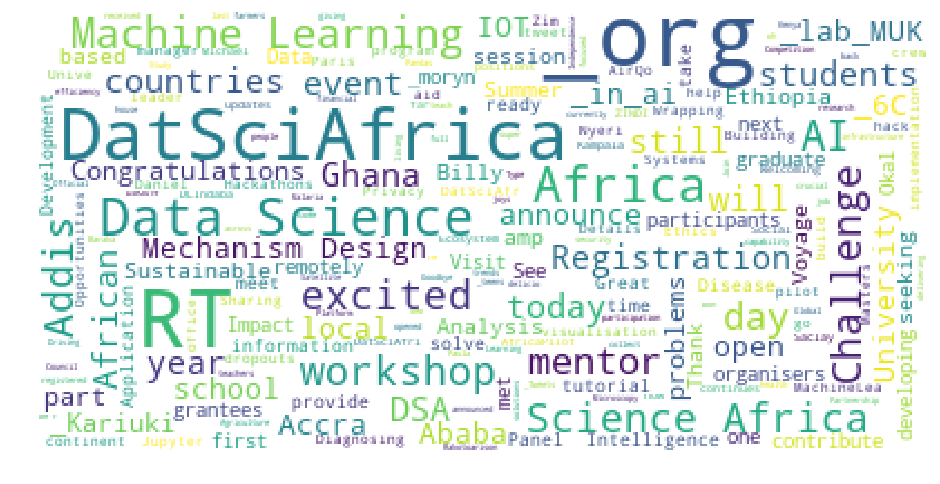

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

mpl.rcParams['figure.figsize']=(16.0,10.0)    
mpl.rcParams['font.size']=12                
mpl.rcParams['savefig.dpi']=1400             
mpl.rcParams['figure.subplot.bottom']=.1 

stopwords = set(STOPWORDS)
text = " ".join(tweet for tweet in bg3.tweet)
print ("There are {} words in the combination of all tweets.".format(len(text)))

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(text))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=1400)

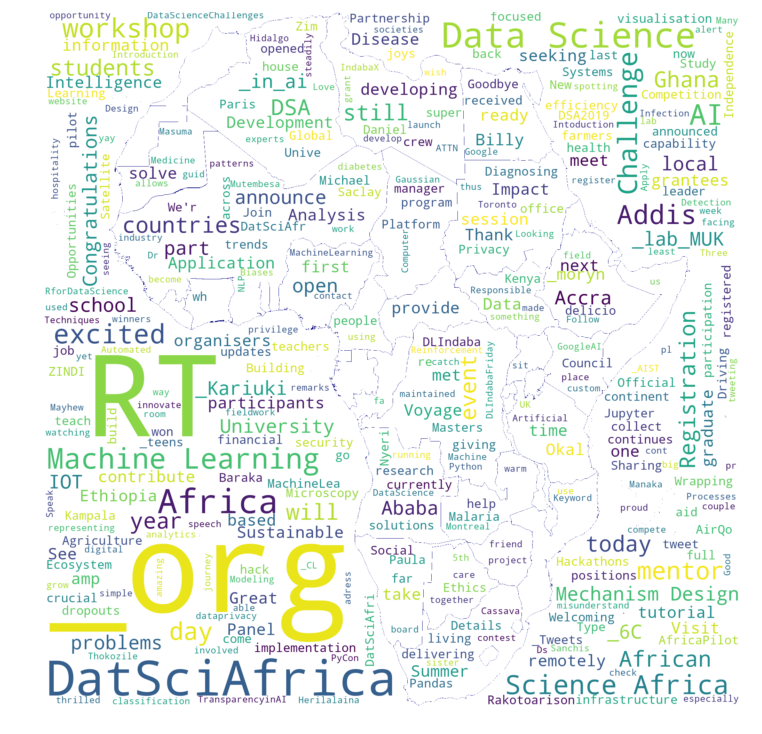

In [24]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import urllib
import requests
import numpy as np
import matplotlib.pyplot as plt

mask= np.array(Image.open("bafrica.png"))

words = " ".join(review for review in bg3.tweet)

# This function takes in your text and your mask and generates a wordcloud. 
def generate_wordcloud(words, mask):
    word_cloud = WordCloud(width = 512, height = 512, background_color='white',max_words=3000,stopwords=STOPWORDS, mask=mask,contour_width=1, contour_color='navy' ).generate(words)
    plt.figure(figsize=(14,10),facecolor = 'white', edgecolor='red')
    plt.imshow(word_cloud,interpolation='bilinear')
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()

#Run the following to generate your wordcloud
generate_wordcloud(str(words), mask)
fig.savefig("word1.png", dpi=1400)

Other maaterials

https://towardsdatascience.com/the-next-level-of-data-visualization-in-python-dd6e99039d5e

https://towardsdatascience.com/a-complete-exploratory-data-analysis-and-visualization-for-text-data-29fb1b96fb6a